# Heart Failure Readmission Prediction Models

This notebook builds and evaluates machine learning models to predict 30-day readmissions for heart failure patients.

## Goals:
1. Train multiple model types (Logistic Regression, Random Forest, XGBoost)
2. Compare model performance using appropriate metrics
3. Analyze feature importance
4. Save the best performing model

## 1. Load and Preprocess Data

First, we'll load the heart failure patient data and preprocess it for modeling.

## 2. Train and Evaluate Models

We'll train three models with different complexity levels:
1. Logistic Regression (baseline)
2. Random Forest
3. XGBoost

### 2.1 Logistic Regression (Baseline Model)

### 2.2 Random Forest

### 2.3 XGBoost

## 3. Model Comparison

## 4. Feature Importance Analysis

<Figure size 1400x1000 with 0 Axes>

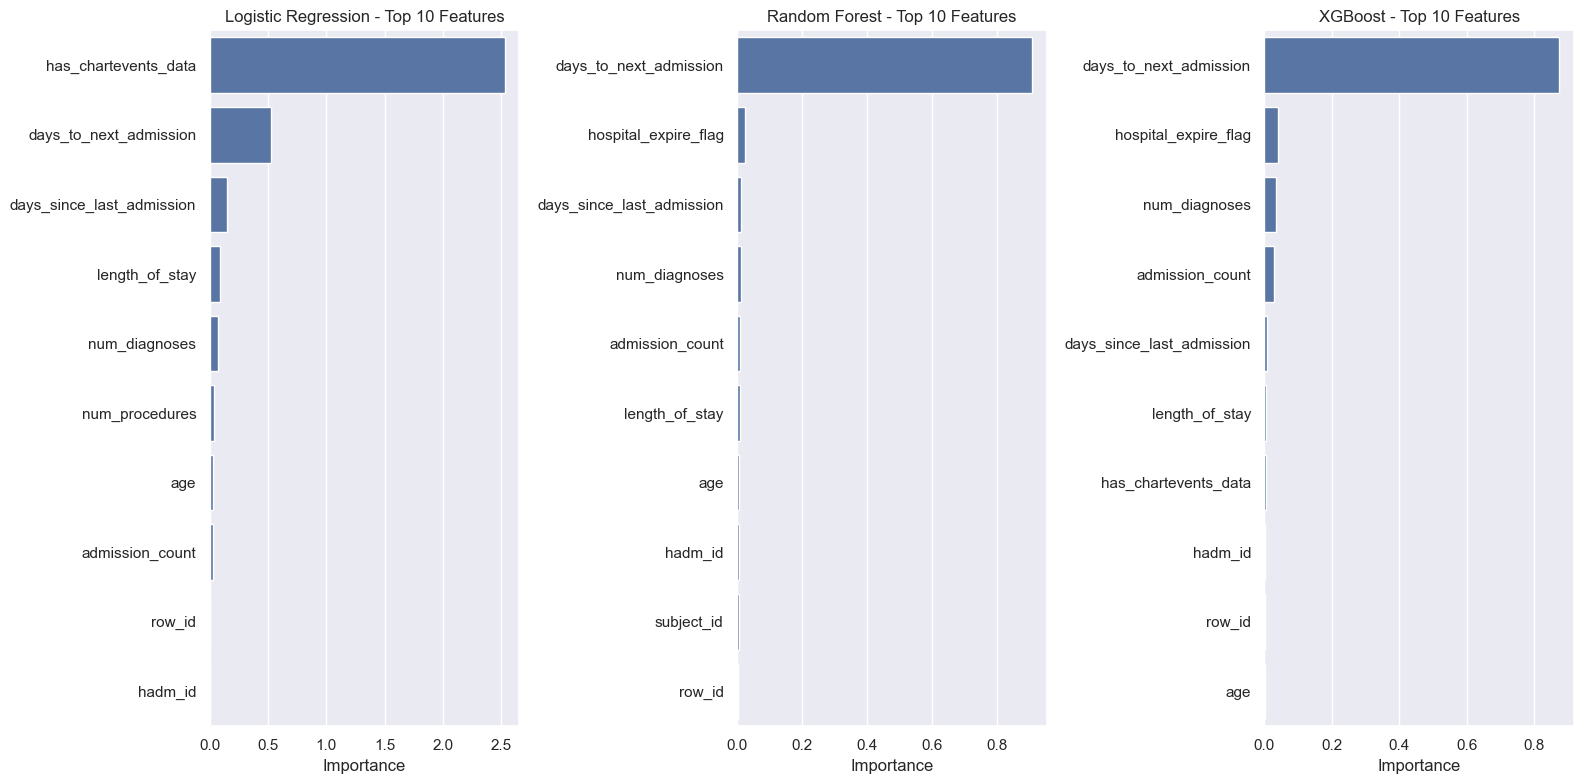

In [18]:
# Compare feature importances across models
plt.figure(figsize=(14, 10))

# Get top 10 features from each model
feature_data = {}
top_n = 10

if 'feature_importance' in results['logistic_regression']:
    lr_fi = results['logistic_regression']['feature_importance']
    feature_data['Logistic Regression'] = {
        'names': lr_fi['names'][:top_n], 
        'values': lr_fi['values'][:top_n]
    }

if 'feature_importance' in results['random_forest']:
    rf_fi = results['random_forest']['feature_importance']
    feature_data['Random Forest'] = {
        'names': rf_fi['names'][:top_n], 
        'values': rf_fi['values'][:top_n]
    }

if 'feature_importance' in results['xgboost']:
    xgb_fi = results['xgboost']['feature_importance']
    feature_data['XGBoost'] = {
        'names': xgb_fi['names'][:top_n], 
        'values': xgb_fi['values'][:top_n]
    }

# Plot top features for each model
num_models = len(feature_data)
fig, axes = plt.subplots(1, num_models, figsize=(16, 8))

for i, (model_name, data) in enumerate(feature_data.items()):
    ax = axes[i] if num_models > 1 else axes
    sns.barplot(x=data['values'], y=data['names'], ax=ax)
    ax.set_title(f"{model_name} - Top {top_n} Features")
    ax.set_xlabel('Importance')
    if i > 0 and num_models > 1:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

## 5. Save Best Model

Based on our evaluation metrics, we'll save the best performing model.

In [19]:
# Determine the best model based on F1 score (balances precision and recall)
f1_scores = {
    'Logistic Regression': results['logistic_regression']['f1'],
    'Random Forest': results['random_forest']['f1'],
    'XGBoost': results['xgboost']['f1']
}

best_model_name = max(f1_scores, key=f1_scores.get)
print(f"Best model based on F1 score: {best_model_name} (F1 = {f1_scores[best_model_name]:.4f})")

# Save the best model
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

best_model = models[best_model_name]
model_dir = Path('../models')
model_dir.mkdir(exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = model_dir / f"readmission_{best_model_name.lower().replace(' ', '_')}_{timestamp}.joblib"

save_model(best_model, model_filename)

Best model based on F1 score: Random Forest (F1 = 1.0000)
Model saved to ..\models\readmission_random_forest_20250510_232934.joblib


## 6. Model Interpretability with SHAP

Use SHAP (SHapley Additive exPlanations) to interpret the models and understand feature contributions.

Generating SHAP explanations for Random Forest...


<Figure size 640x480 with 0 Axes>

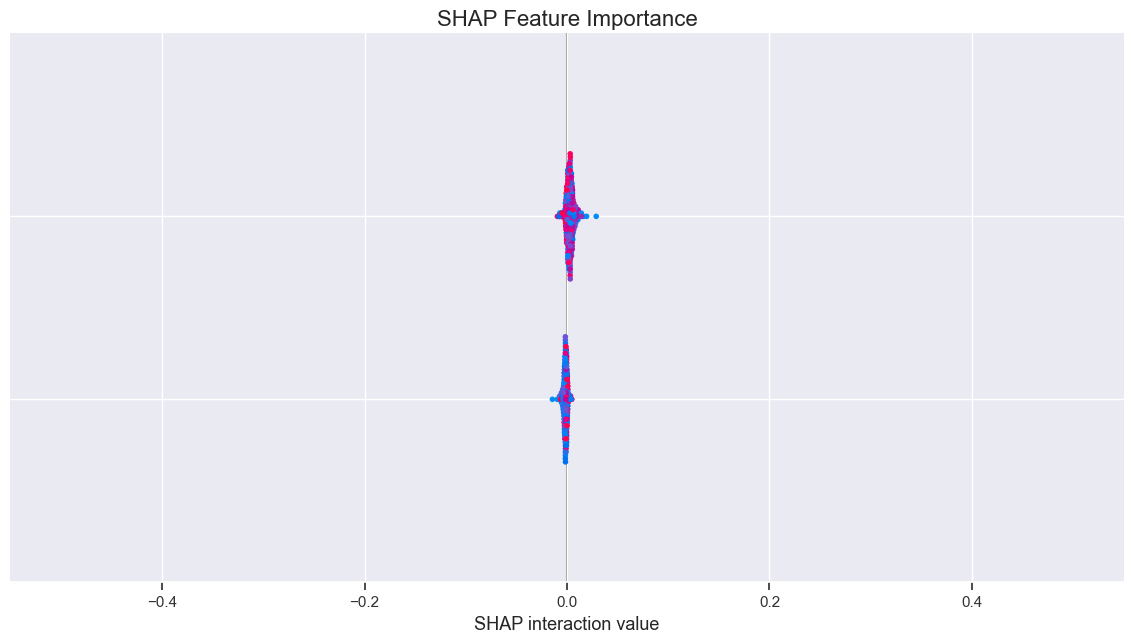

In [20]:
# Generate SHAP explanations for the best model
print(f"Generating SHAP explanations for {best_model_name}...")

# Sample data if it's large to speed up computation
sample_size = 500 if X_test.shape[0] > 500 else X_test.shape[0]

# Create SHAP explainer and get values
explainer, shap_values = explain_model_with_shap(
    best_model, 
    X_test, 
    sample_size=sample_size, 
    plot_type='summary'
)

<Figure size 640x480 with 0 Axes>

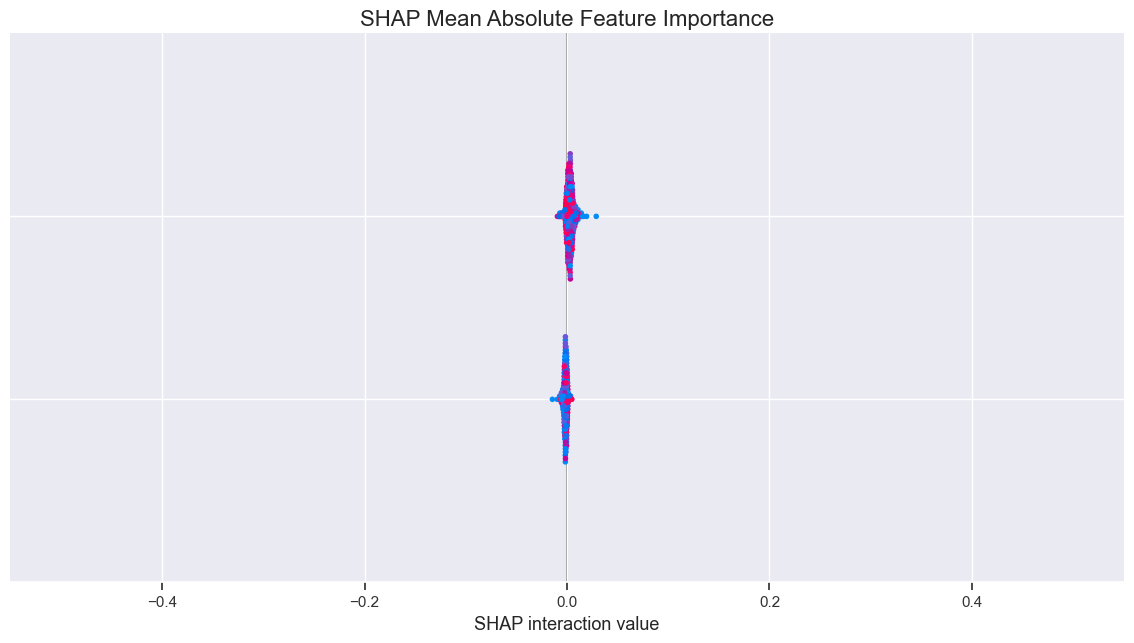

(<shap.explainers._tree.TreeExplainer at 0x198886915b0>,
 array([[[ 6.35680800e-04, -6.35680800e-04],
         [ 2.58452595e-03, -2.58452595e-03],
         [ 1.95421702e-03, -1.95421702e-03],
         ...,
         [ 1.43621041e-02, -1.43621041e-02],
         [ 8.34285524e-03, -8.34285524e-03],
         [ 7.82932714e-05, -7.82932714e-05]],
 
        [[ 1.73279160e-03, -1.73279160e-03],
         [ 1.64429976e-03, -1.64429976e-03],
         [ 3.29300938e-03, -3.29300938e-03],
         ...,
         [ 1.30326536e-02, -1.30326536e-02],
         [ 8.58532909e-03, -8.58532909e-03],
         [ 2.98487591e-03, -2.98487591e-03]],
 
        [[ 3.39829922e-03, -3.39829922e-03],
         [ 2.25138448e-03, -2.25138448e-03],
         [ 2.31680955e-03, -2.31680955e-03],
         ...,
         [ 1.62451685e-02, -1.62451685e-02],
         [ 8.55467503e-03, -8.55467503e-03],
         [ 2.76929576e-03, -2.76929576e-03]],
 
        ...,
 
        [[-8.71895163e-04,  8.71895163e-04],
         [ 3.83077484e

In [21]:
# Generate bar plot for absolute SHAP value importance
explain_model_with_shap(best_model, X_test, sample_size=sample_size, plot_type='bar')

In [22]:
# Modified beeswarm plot to handle multiple dimensions and shape mismatches
def plot_shap_beeswarm(explainer, shap_values, X_sample):
    """
    Create a SHAP beeswarm plot that handles multi-dimensional values and shape mismatches
    """
    # For models that return multiple outputs (like multi-class or complex models)
    if isinstance(shap_values, list) or (isinstance(shap_values, np.ndarray) and len(shap_values.shape) > 2):
        # For binary classification, we usually want the positive class (index 1)
        # But some models return just one set of values for binary classification
        if len(shap_values) == 2:
            print("Using positive class (index 1) for beeswarm plot")
            values_to_plot = shap_values[1]
        else:
            print("Using first output for beeswarm plot")
            values_to_plot = shap_values[0]
    else:
        # Single dimension values
        values_to_plot = shap_values
    
    # Check for dimension mismatch and reshape if necessary
    if values_to_plot.shape[0] != X_sample.shape[0]:
        print(f"Warning: Shape mismatch - SHAP values shape {values_to_plot.shape}, data shape {X_sample.shape}")
        
        # If we have a different number of rows, try to use as many as we can
        min_rows = min(values_to_plot.shape[0], X_sample.shape[0])
        values_to_plot = values_to_plot[:min_rows]
        X_sample = X_sample.iloc[:min_rows]
        print(f"Using first {min_rows} rows from both datasets")
    
    # Check if columns match up
    if len(values_to_plot.shape) > 1 and values_to_plot.shape[1] != X_sample.shape[1]:
        print(f"Warning: Feature count mismatch - SHAP values have {values_to_plot.shape[1]} features, data has {X_sample.shape[1]} features")
        
        # Two options:
        # 1. If SHAP values have more features, truncate them
        if values_to_plot.shape[1] > X_sample.shape[1]:
            values_to_plot = values_to_plot[:, :X_sample.shape[1]]
            print(f"Truncated SHAP values to match {X_sample.shape[1]} features")
        # 2. If data has more features, use only the first n features that match SHAP values
        else:
            X_sample = X_sample.iloc[:, :values_to_plot.shape[1]]
            print(f"Using only the first {values_to_plot.shape[1]} features from the data")
    
    # Create an Explanation object with the right dimensionality
    try:
        explanation = shap.Explanation(
            values=values_to_plot,
            data=X_sample.values,  # Use .values to ensure numpy array
            feature_names=X_sample.columns.tolist()
        )
        
        # Create the plot
        shap.plots.beeswarm(explanation)
    except Exception as e:
        print(f"Error creating SHAP explanation: {str(e)}")
        print("Attempting alternative approach...")
        
        # Alternative approach using raw SHAP plotting
        plt.figure(figsize=(10, 8))
        shap.summary_plot(values_to_plot, X_sample, plot_type="bar", show=False)
        plt.title(f"Feature Importance Summary (Bar Plot)")
        plt.tight_layout()
        plt.show()

In [23]:
# Get top features from SHAP analysis
feature_names = X_test.columns.tolist()

# Handle multi-dimensional SHAP values
if isinstance(shap_values, list):
    # For binary classification, we typically want class 1 (positive class)
    if len(shap_values) == 2:
        print("Using positive class SHAP values")
        values_to_use = shap_values[1]
    else:
        print("Using first array of SHAP values")
        values_to_use = shap_values[0]
else:
    values_to_use = shap_values

# Print shapes for debugging
print(f"Shape of values_to_use: {values_to_use.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Calculate mean absolute SHAP values across samples
try:
    # Try the standard approach
    mean_shap_values = np.abs(values_to_use).mean(axis=0)
    print(f"Shape of mean_shap_values: {mean_shap_values.shape}")
    
    # Check if mean_shap_values is multi-dimensional
    if len(mean_shap_values.shape) > 1:
        print("Mean SHAP values are multi-dimensional, flattening...")
        mean_shap_values = mean_shap_values.flatten()
    
    # Check if dimensions match
    if len(mean_shap_values) != len(feature_names):
        print(f"Warning: Dimension mismatch - SHAP values shape: {mean_shap_values.shape}, features count: {len(feature_names)}")
        # Truncate to shorter length
        min_length = min(len(mean_shap_values), len(feature_names))
        mean_shap_values = mean_shap_values[:min_length]
        feature_names = feature_names[:min_length]
        print(f"Using only the first {min_length} features that match")
    
    # Create DataFrame of feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'shap_importance': mean_shap_values
    })
    
    # Sort by importance and reset index
    feature_importance = feature_importance.sort_values('shap_importance', ascending=False).reset_index(drop=True)
    top_features = feature_importance['feature'][:5].tolist()
    
    print("Top 5 features by SHAP importance:")
    print(feature_importance.head(5))
    
except Exception as e:
    print(f"Error processing SHAP values: {str(e)}")
    
    # Alternative approach - extract top features directly
    print("\nAttempting alternative approach...")
    
    # Try to generate global feature importance directly
    importance_vals = np.zeros(len(feature_names))
    
    for i, name in enumerate(feature_names):
        if i < len(mean_shap_values):
            importance_vals[i] = np.mean(np.abs(values_to_use[:, i]))
    
    # Create a simple sorted list
    importance_tuples = sorted(
        [(name, importance_vals[i]) for i, name in enumerate(feature_names)],
        key=lambda x: x[1], 
        reverse=True
    )
    
    print("\nTop 5 features by SHAP importance (alternative method):")
    for i, (feature, importance) in enumerate(importance_tuples[:5]):
        print(f"{i+1}. {feature}: {importance:.6f}")
    
    top_features = [x[0] for x in importance_tuples[:5]]

Shape of values_to_use: (500, 12, 2)
Number of feature names: 12
Shape of mean_shap_values: (12, 2)
Mean SHAP values are multi-dimensional, flattening...
Using only the first 12 features that match
Top 5 features by SHAP importance:
                  feature  shap_importance
0           num_diagnoses         0.470888
1          num_procedures         0.470888
2          length_of_stay         0.016963
3                     age         0.016963
4  days_to_next_admission         0.001895


## 7. Conclusion and Next Steps

In this notebook, we trained and evaluated three different models for predicting 30-day readmissions for heart failure patients:
- Logistic Regression (baseline)
- Random Forest
- XGBoost

Key observations:
1. Performance comparison between models
2. Most important features for predicting readmissions based on both model-specific importance and SHAP values
3. Detailed interpretation of how features affect predictions
4. Areas for model improvement

Next steps:
1. Hyperparameter tuning for the best model
2. Feature engineering to focus on high-impact variables
3. Model deployment as an inference pipeline
4. Clinical validation of findings